# Quantum States and the Density Matrix

A **density matrix** (or **density operator**, often denoted as $\rho$) is a mathematical object used in quantum mechanics to describe the state of a quantum system. It is especially useful for representing both **pure states** (like $|0\rangle$ or $|1\rangle$) and **mixed states** (statistical mixtures of different quantum states).

## Pure State (Single Qubit)

### Density Matrix

If a quantum system is in a pure state $|\psi\rangle = \alpha|0\rangle + \beta|1\rangle$, its density matrix is:

$$
\rho = |\psi\rangle\langle \psi| = \begin{pmatrix}
\alpha \\
\beta
\end{pmatrix} \begin{pmatrix}
\alpha^* & \beta^*
\end{pmatrix} = \begin{pmatrix}
\alpha \alpha^* & \alpha \beta^* \\
\beta \alpha^* & \beta \beta^*
\end{pmatrix} = \begin{pmatrix}
|\alpha|^2 & \alpha \beta^* \\
\beta \alpha^* & |\beta|^2
\end{pmatrix}
$$

- **Diagonal elements**: $|\alpha|^2$ and $|\beta|^2$ represent the probabilities of measuring the qubit in states $|0\rangle$ and $|1\rangle$, respectively.
- **Off-diagonal elements**: $\alpha \beta^*$ and $\beta \alpha^*$ indicates quantum coherence (superposition/interference) between $|0\rangle$ and $|1\rangle$.

Note: **Coherence** refers to well-defined (fixed or time-varying but not random) phase relationships between quantum states, represented by nonzero off-diagonal elements in the density matrix. It enables **superposition** and is essential for **interference** effects. Superposition is a property of pure quantum states. **Interference** arises from coherent combinations of states and disappears when coherence is lost (**decoherence**).

### Where Does the Density Matrix Come From?

In quantum mechanics, we calculate the expected value of an observable $A$ for a pure state $|\psi\rangle$ using the formula:

$$
\langle A \rangle = \langle \psi| A |\psi\rangle
$$

This is a scalar value so we can also write it as a trace, which sums the diagonal elements of a matrix:

$$
\langle \psi| A |\psi\rangle = \text{Tr}(\langle \psi| A |\psi\rangle)
$$

Now, using the cyclic property of the trace ($\text{Tr}(AB) = \text{Tr}(BA)$), we can rearrange the terms inside the trace:

$$
\text{Tr}(\langle \psi| A |\psi\rangle) = \text{Tr}(A |\psi\rangle\langle \psi|)
$$

This expression introduces the density matrix:

$$
\rho = |\psi\rangle\langle \psi|
$$

So the expecation value becomes:

$$
\langle A \rangle = \text{Tr}(A \rho)
$$

### Pure State vs. Mixed State on the Bloch Sphere

Because the density matrix is built from a single vector, it has a rank of 1--all of its rows (or columns) are just scaled copies of a single row (or column). 

- A rank-1 density matrix represents a pure state — the system is in a definite, known state.
- If a density matrix has a higher rank, it means the system is in a statistical mixture of different pure states.

Another important way to characterize whether a state is pure or mixed is through its purity, defined as:

$$
\text{Purity} = \text{Tr}(\rho^2)
$$

For a pure state, purity equals 1, reflecting maximal knowledge of the quantum state.
For a mixed state, purity is less than 1, indicating classical uncertainty or decoherence.

This scalar measure is easy to compute and is often used in practice to quantify how "mixed" a state is.

On the Bloch sphere, this distinction is geometric:

- Pure states (rank = 1) lie on the surface of the sphere because they are single states with well-defined probabilities.
- Mixed states (rank > 1) lie inside the sphere, closer to the center as they become more mixed.

A mixed state's point on the Bloch sphere is the probability-weighted average of the Bloch vectors of the pure states in the mixture. Because averages of surface points lie inside the sphere, mixed states live inside the Bloch sphere, not on its surface.

### Pure State Example: $|0\rangle$

$$
\rho = |0\rangle\langle 0| = \begin{pmatrix}
1 \\
0
\end{pmatrix} \begin{pmatrix}
1 & 0
\end{pmatrix} = \begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix}
$$

- Probability of measuring $|0\rangle$ is 1 (certainty).
- Probability of measuring $|1\rangle$ is 0 (impossible).
- Off-diagonal elements are 0, indicating no coherence.

In [1]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import DensityMatrix

qc = QuantumCircuit(1)
qc.h(0)
qc.s(0)

rho = DensityMatrix.from_instruction(qc)

print(rho)
print("Purity:", rho.purity())

DensityMatrix([[0.5+0.j , 0. -0.5j],
               [0. +0.5j, 0.5+0.j ]],
              dims=(2,))
Purity: (0.9999999999999996+0j)


Alternatively, we can use the `from_label` method to create the density matrix from the state label. 

In [2]:
from qiskit.quantum_info import Statevector

# Define the pure state |psi> = |0>
psi = Statevector.from_label('0')

# Convert to density matrix
rho = DensityMatrix(psi)
print(rho)
print("Purity:", rho.purity())

DensityMatrix([[1.+0.j, 0.+0.j],
               [0.+0.j, 0.+0.j]],
              dims=(2,))
Purity: (1+0j)


We can visualize the density matrix as follows:

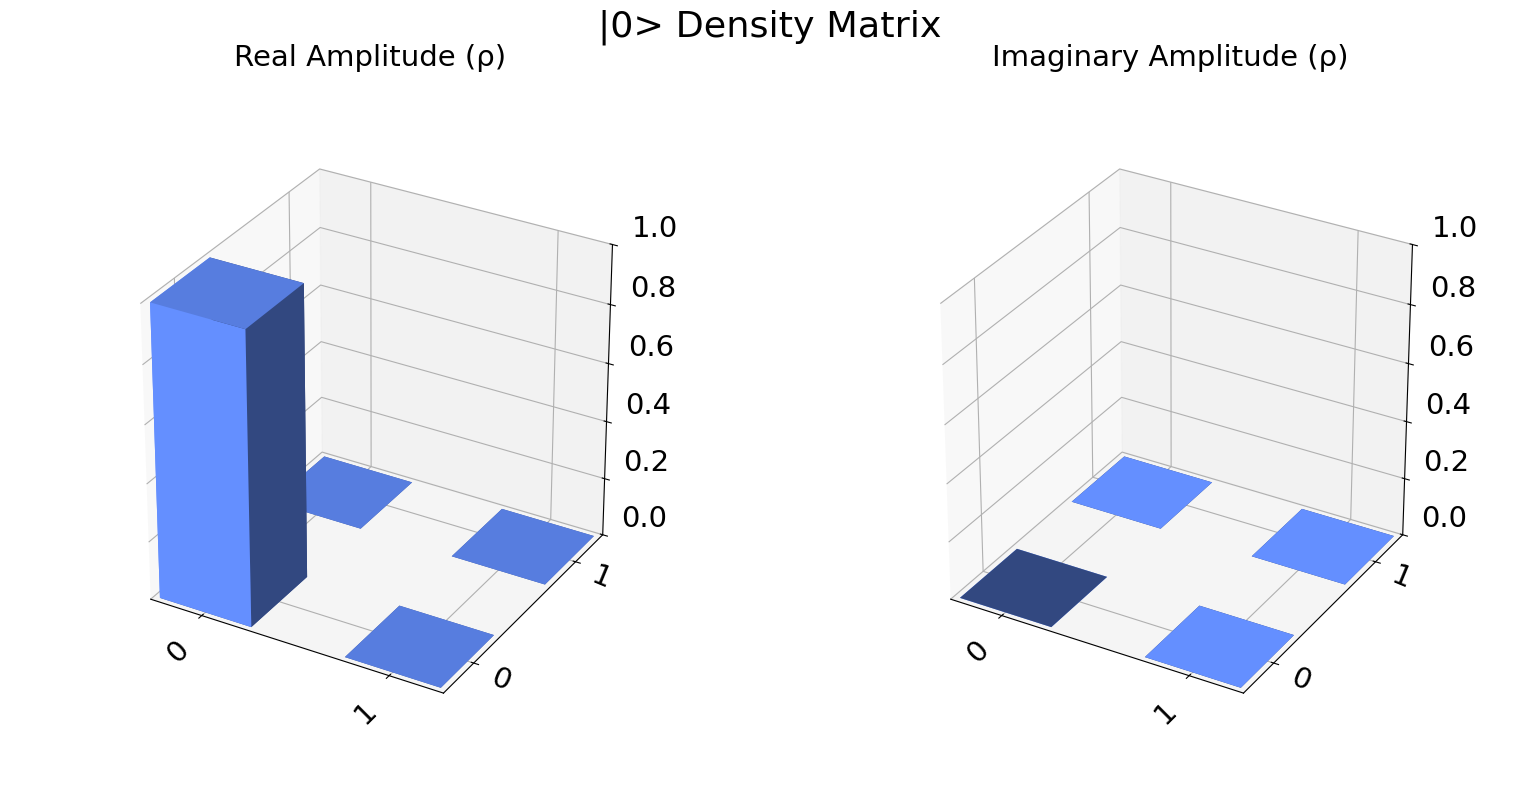

In [3]:
from qiskit.visualization import plot_state_city

plot_state_city(rho, title="|0> Density Matrix")

### Pure State Example: $|+\rangle$:

$$
\rho = |+\rangle\langle +| = \frac{1}{2}\begin{pmatrix}
1 \\
1
\end{pmatrix} \begin{pmatrix}
1 & 1
\end{pmatrix} = \frac{1}{2}\begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix}
$$

- The diagonal elements are $\frac{1}{2}$, indicating equal probabilities of measuring the qubit in states $|0\rangle$ and $|1\rangle$. 
- The off-diagonal elements are $\frac{1}{2}$, indicating maximum coherence between the states.

In [4]:
psi = Statevector.from_label('+')
rho = DensityMatrix(psi)
print(rho)
print("Purity:", rho.purity())

DensityMatrix([[0.5+0.j, 0.5+0.j],
               [0.5+0.j, 0.5+0.j]],
              dims=(2,))
Purity: (0.9999999999999996+0j)


That tiny deviation from 1 is due to floating-point rounding. This is a pure state.

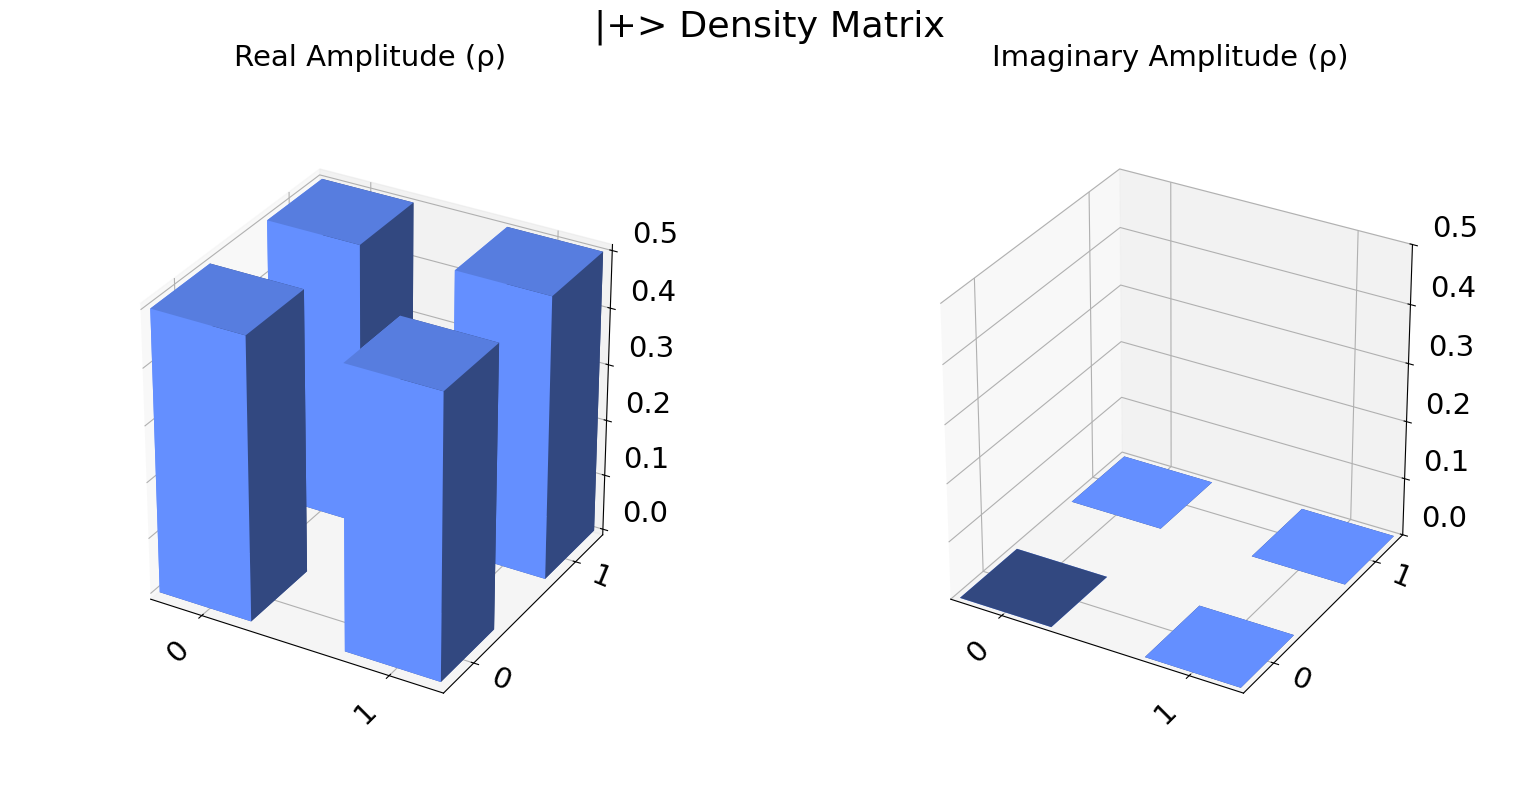

In [5]:
plot_state_city(rho, title="|+> Density Matrix")

### Pure State Example: $|+i\rangle$:

$$
\rho = |+i\rangle\langle +i| = \frac{1}{2}\begin{pmatrix}
1 \\
i
\end{pmatrix} \begin{pmatrix}
1 & -i
\end{pmatrix} = \frac{1}{2}\begin{pmatrix}
1 & -i \\
-i & 1
\end{pmatrix}
$$

- The diagonal elements are $\frac{1}{2}$, indicating equal probabilities of measuring the qubit in states $|0\rangle$ and $|1\rangle$.
- The off-diagonal elements are $\frac{-i}{2}$, indicating maximum coherence between the states.

DensityMatrix([[0.5+0.j , 0. -0.5j],
               [0. +0.5j, 0.5+0.j ]],
              dims=(2,))
Purity: (0.9999999999999996+0j)


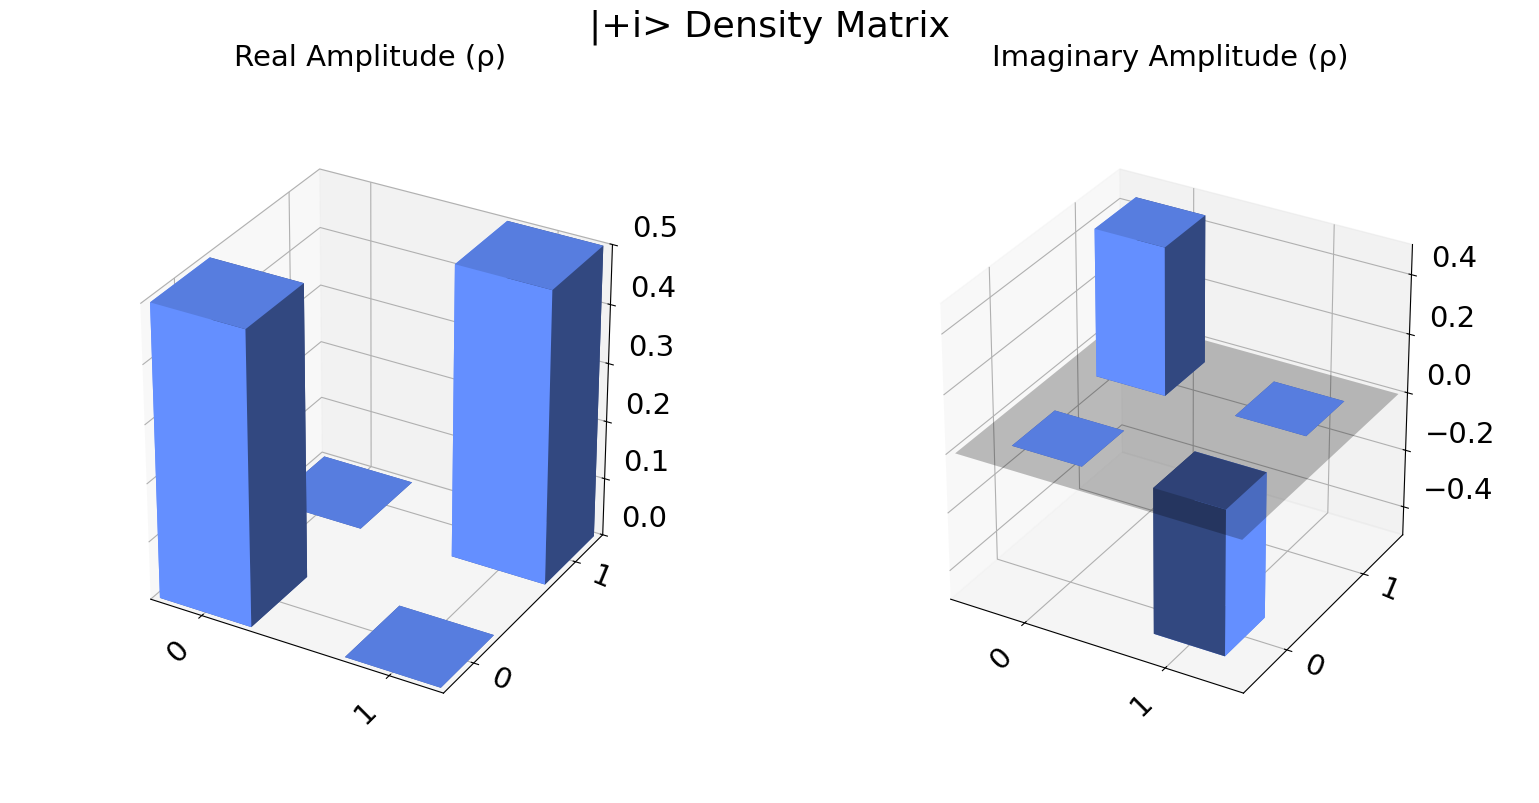

In [6]:
psi = Statevector.from_label('r')  # |r> means |+i> ('r' for right circularly polarized)
rho = DensityMatrix(psi)
print(rho)
print("Purity:", rho.purity())
plot_state_city(rho, title="|+i> Density Matrix")

## Classical Mixture of Basis States (Single Qubit)

When a qubit is in a mixed state, it means that-due to some process such as noise, decoherence, loss of information, or partial observation-you no longer know its exact (pure) quantum state. Instead, you only know the probabilities for it being in various possible pure states.

If the system is in $|0\rangle$ with probability $p_0$ and in $|1\rangle$ with probability $p_1$ (with $p_0 + p_1 = 1$), the density matrix is given by:

$$
\rho = p_0 |0\rangle\langle 0| + p_1 |1\rangle\langle 1| = p_0 \begin{pmatrix}
1 & 0 \\
0 & 0
\end{pmatrix} + p_1 \begin{pmatrix}
0 & 0 \\
0 & 1
\end{pmatrix} = \begin{pmatrix}
p_0 & 0 \\
0 & p_1
\end{pmatrix}
$$

- **Diagonal elements**: $p_0$ and $p_1$ represent the probabilities of measuring the qubit in states $|0\rangle$ and $|1\rangle$, respectively.
- **Off-diagonal elements**: are zero, indicating no coherence.

Therefore, the density matrix for a classical mixture of states is diagonal.

DensityMatrix([[0.7+0.j, 0. +0.j],
               [0. +0.j, 0.3+0.j]],
              dims=(2,))
Purity: (0.58+0j)


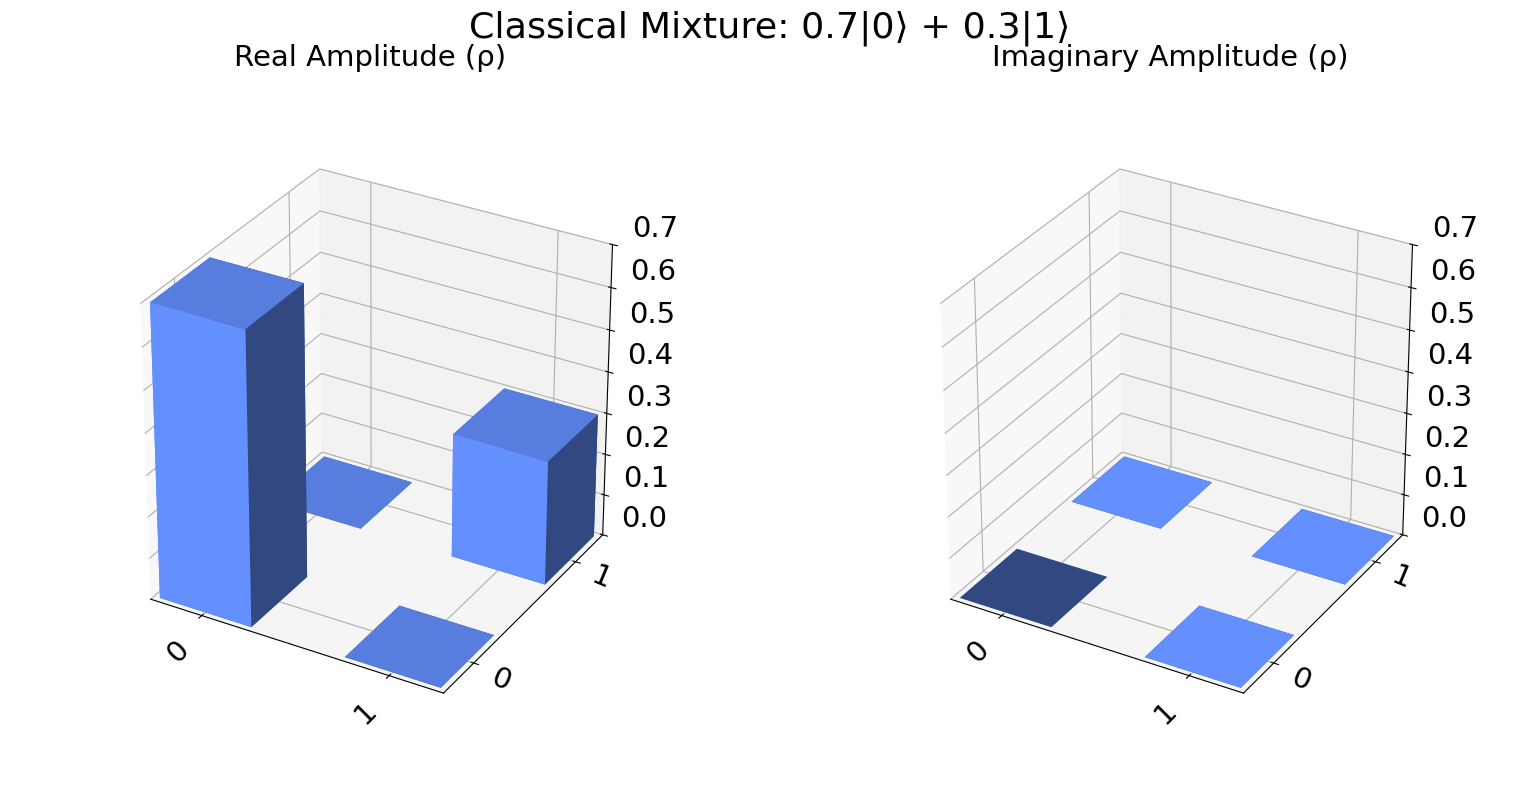

In [7]:
# Define probabilities
p0 = 0.7
p1 = 0.3

# Construct the density matrix
rho = DensityMatrix([[p0, 0],
                     [0,  p1]])
print(rho)
print("Purity:", rho.purity())

# Visualize the matrix
plot_state_city(rho, title="Classical Mixture: {:.1f}|0⟩ + {:.1f}|1⟩".format(p0, p1))

For a mixed state, the purity $Tr(\rho^2) < 1$. This indicates that the state is not pure and has some classical uncertainty.

## Classical Mixture of Superposition States (Single Qubit)

Suppose your system is in $|+\rangle = \frac{1}{\sqrt{2}}(|0\rangle + |1\rangle)$ with probability $p_+$ and in $|-\rangle = \frac{1}{\sqrt{2}}(|0\rangle - |1\rangle)$ with probability $p_-$ (with $p_+ + p_- = 1$). The density matrix is given by:

$$
\rho = p_+ |+\rangle\langle +| + p_- |-\rangle\langle -| = p_+ \frac{1}{2}\begin{pmatrix}
1 & 1 \\
1 & 1
\end{pmatrix} + p_- \frac{1}{2}\begin{pmatrix}
1 & -1 \\
-1 & 1
\end{pmatrix} = \frac{1}{2}\begin{pmatrix}
p_+ + p_- & p_+ - p_- \\
p_+ - p_- & p_+ + p_-
\end{pmatrix} = \frac{1}{2}\begin{pmatrix}
1 & p_+ - p_- \\
p_+ - p_- & 1
\end{pmatrix}
$$

- **Diagonal elements**: $\frac{1}{2}$, indicating equal probabilities of measuring the qubit in states $|0\rangle$ and $|1\rangle$.
- **Off-diagonal elements**: $\frac{1}{2}(p_+ - p_-)$, indicating coherence between the states.

The off-diagonal elements reflect the balance of coherent contributions. Therefore, a mixed state can have some coherence (nonzero off-diagonal elements), but if $p_+ = p_-$, the coherence disappears.

Density Matrix (ρ):
DensityMatrix([[0.5+0.j, 0.2+0.j],
               [0.2+0.j, 0.5+0.j]],
              dims=(2,))
Purity: (0.58+0j)


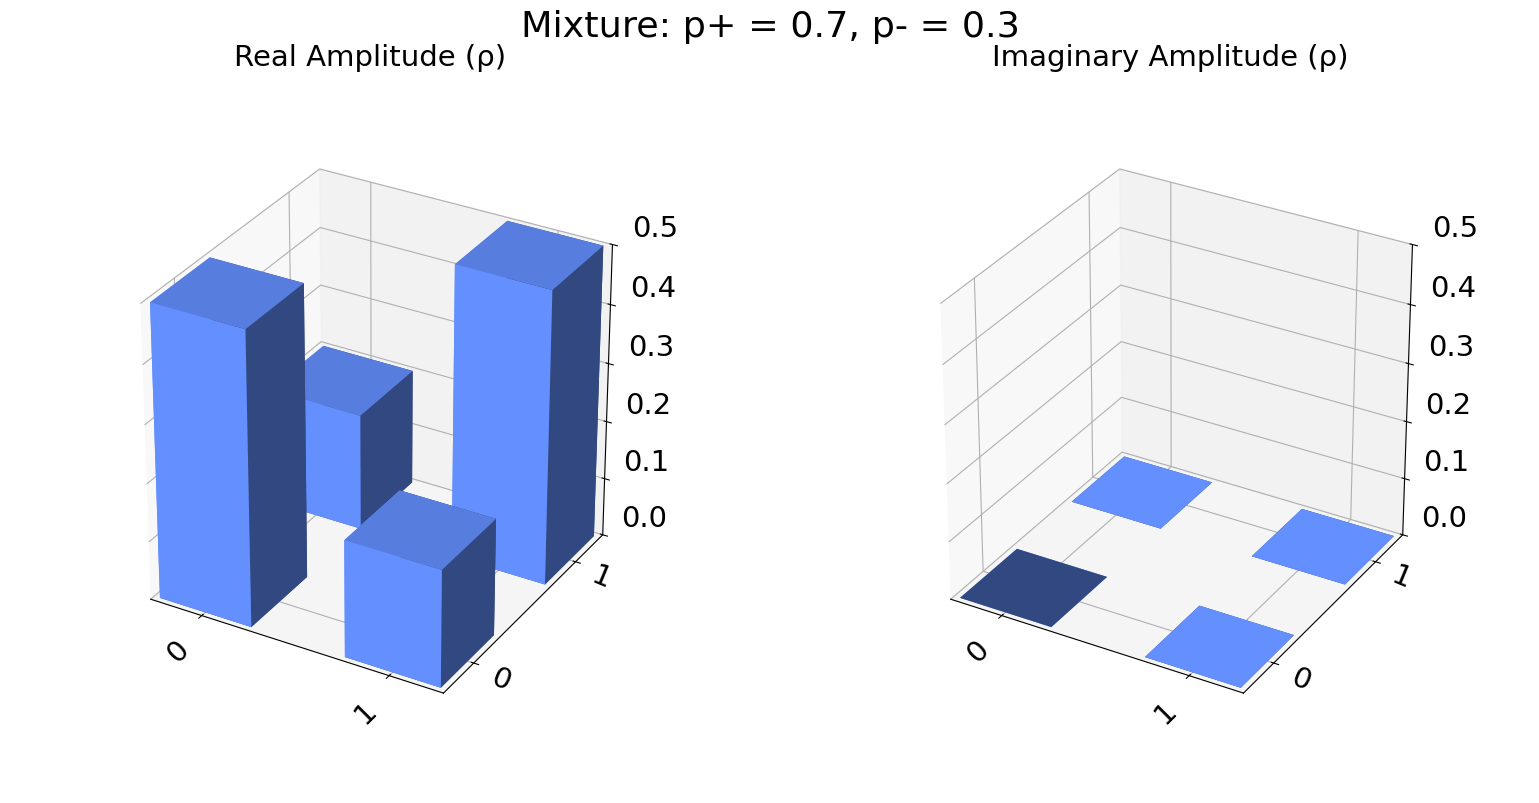

In [8]:
import numpy as np

# Define probabilities
p_plus = 0.7
p_minus = 1 - p_plus

# Define |+> and |-> density matrices
rho_plus = np.array([[0.5, 0.5],
                     [0.5, 0.5]])

rho_minus = np.array([[0.5, -0.5],
                      [-0.5, 0.5]])

# Mixed density matrix: p_+ * |+><+| + p_- * |-><-|
rho_mixed = p_plus * rho_plus + p_minus * rho_minus
rho_dm = DensityMatrix(rho_mixed)

# Display density matrix
print("Density Matrix (ρ):")
print(rho_dm)
print("Purity:", rho_dm.purity())

# Visualize the density matrix
fig = plot_state_city(rho_dm, title=f"Mixture: p+ = {p_plus:.1f}, p- = {p_minus:.1f}")

# Adjust z-axis limits to fit the bars
for ax in fig.axes:
   ax.set_zlim(0, 0.5)  # Adjust upper limit as needed
fig

## Mixture of Multi-Qubit States

If we have two qubits, then the basis states are $|00\rangle, |01\rangle, |10\rangle, |11\rangle$. 

The density matrix for a two-qubit system is a $4 \times 4$ matrix, and it can be represented as:

$$
\rho = p_{00} |00\rangle\langle 00| + p_{01} |01\rangle\langle 01| + p_{10} |10\rangle\langle 10| + p_{11} |11\rangle\langle 11|
$$

where $p_{00}, p_{01}, p_{10}, p_{11}$ are the probabilities of measuring the system in states $|00\rangle, |01\rangle, |10\rangle, |11\rangle$, respectively.


Two-Qubit Density Matrix (ρ):
DensityMatrix([[0.4+0.j, 0. +0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0.1+0.j, 0. +0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0.2+0.j, 0. +0.j],
               [0. +0.j, 0. +0.j, 0. +0.j, 0.3+0.j]],
              dims=(2, 2))
Purity: (0.30000000000000004+0j)


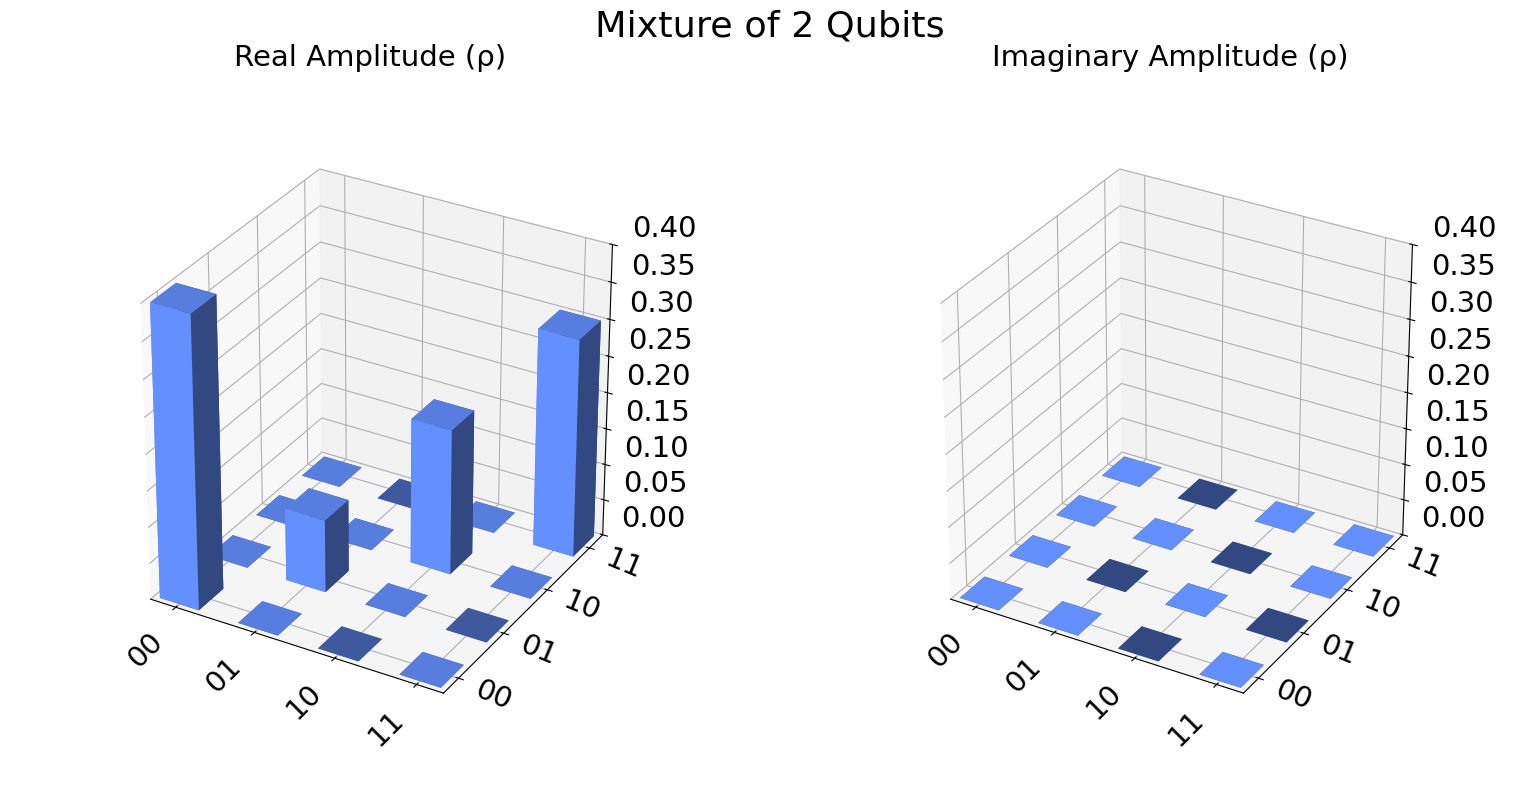

In [9]:
# Define basis states as statevectors
ket_00 = Statevector.from_label('00')
ket_01 = Statevector.from_label('01')
ket_10 = Statevector.from_label('10')
ket_11 = Statevector.from_label('11')

# Define probabilities (must sum to 1)
p = {
    '00': 0.4,
    '01': 0.1,
    '10': 0.2,
    '11': 0.3
}

# Construct density matrix as a weighted sum of outer products
rho = (
    p['00'] * DensityMatrix(ket_00) +
    p['01'] * DensityMatrix(ket_01) +
    p['10'] * DensityMatrix(ket_10) +
    p['11'] * DensityMatrix(ket_11)
)

# Display the matrix
print("Two-Qubit Density Matrix (ρ):")
print(rho)
print("Purity:", rho.purity())
plot_state_city(rho, title="Mixture of 2 Qubits")

## General Mixed State (with Coherence)

More generally, a mixed state can be represented as:
$$
\rho = \sum\limits_i p_i |\psi_i\rangle\langle \psi_i|
$$

where $p_i$ are the probabilities of being in a pure state $|\psi_i\rangle$.

Again the sum of the probabilities must be 1, i.e., $\sum\limits_i p_i = 1$.

DensityMatrix([[0.8+0.j, 0.2+0.j],
               [0.2+0.j, 0.2+0.j]],
              dims=(2,))
Purity: (0.7599999999999999+0j)


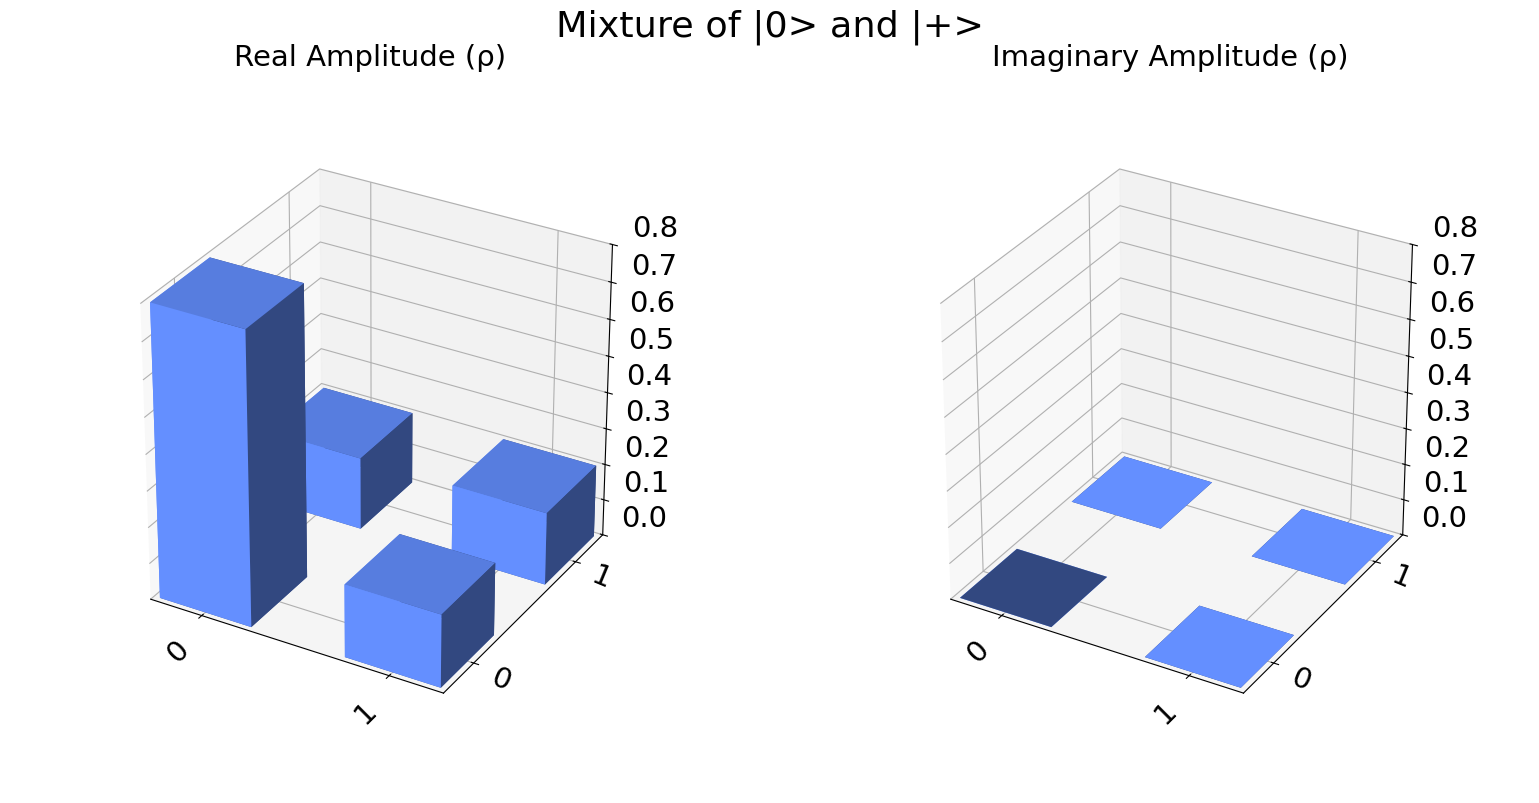

In [10]:
# Example: Mixed State of |0> and |+>

# Define pure states
psi_0 = Statevector.from_label('0')
psi_plus = Statevector.from_label('+')

# Probabilities
p0 = 0.6
p_plus = 0.4

# Construct density matrix: ρ = p0 |0⟩⟨0| + p_plus |+⟩⟨+|
rho = (
    p0 * DensityMatrix(psi_0) +
    p_plus * DensityMatrix(psi_plus)
)

# Display properties
print(rho)
print("Purity:", rho.purity())

fig = plot_state_city(rho, title="Mixture of |0> and |+>")
# Adjust z-axis limits to fit the bars
for ax in fig.axes:
   ax.set_zlim(0, 0.8)  # Adjust upper limit as needed
fig

## Why Use Density Matrices?

A **density matrix** is a general way to describe the state of a quantum system, capturing both pure and mixed states.

- **Pure states**: Can be described by a state vector (like $|0\rangle$), but density matrices are more general and can describe statistical mixtures, too.
- **Mixed states**: Occur when the system is not in a definite quantum state, but in a probabilistic combination.
- **Partial information**: When you only know part of a system (e.g., after tracing out some qubits), the remaining subsystem may be mixed.

Even if a composite quantum system is in a pure entangled state, the subsystem (a part of it) can appear mixed if we only have access to that part.

This happens when we trace out the other part — that is, we mathematically “ignore” or “average over” it.

### Example: Bell State

Consider the entangled state:

$$
|\Phi^+\rangle = \frac{1}{\sqrt{2}}(|00\rangle + |11\rangle)
$$

This is a pure state of two qubits.

But if we trace out (ignore) one qubit, the reduced state of the other qubit is:

$$
\rho_\text{reduced} = \text{Tr}_1(|\Phi^+\rangle\langle \Phi^+|) = \frac{1}{2}\begin{pmatrix}
1 & 0 \\
0 & 1
\end{pmatrix}
$$

where $\text{Tr}_1$ means "take the partial trace over qubit 1" (the second qubit). So, we're only looking at the first qubit.

Reduced Density Matrix (qubit 0):
DensityMatrix([[0.5+0.j, 0. +0.j],
               [0. +0.j, 0.5+0.j]],
              dims=(2,))
Purity: (0.4999999999999998+0j)


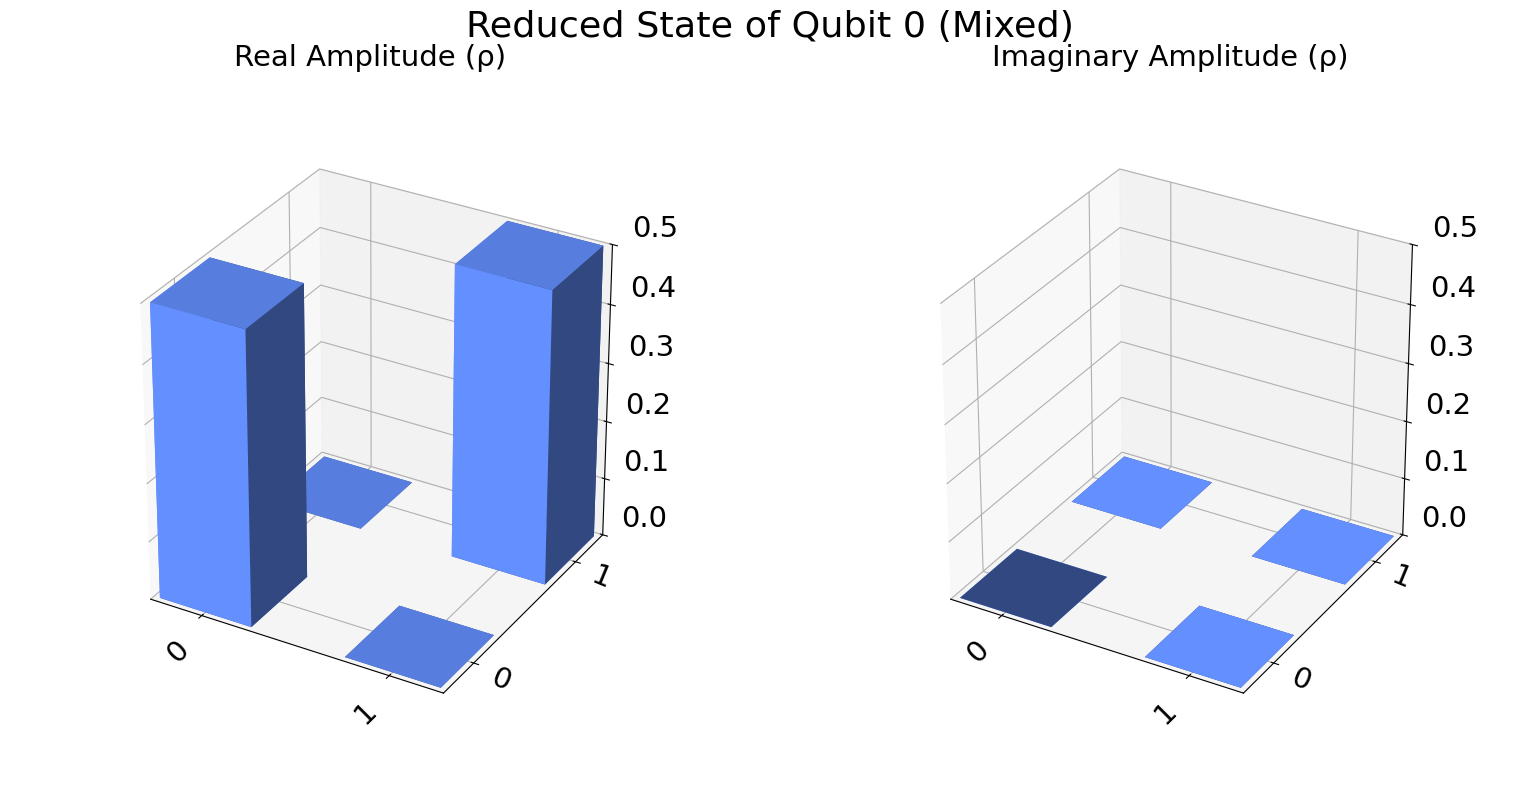

In [11]:
from qiskit.quantum_info import partial_trace

# Create Bell state |Φ+> = (|00> + |11>)/√2
qc = QuantumCircuit(2)
qc.h(0)
qc.cx(0, 1)

# Get the full pure statevector
bell_state = Statevector.from_instruction(qc)

# Convert to density matrix
rho_full = DensityMatrix(bell_state)

# Trace out qubit 1 ⇒ reduced state of qubit 0
rho_reduced = partial_trace(rho_full, [1])

# Print results
print("Reduced Density Matrix (qubit 0):")
print(rho_reduced)
print("Purity:", rho_reduced.purity())

# Visualize
plot_state_city(rho_reduced, title="Reduced State of Qubit 0 (Mixed)")

The reduced density matrix $\rho_\text{reduced}$ is a mixed state, even though the overall system is in a pure entangled state. This happens because when we trace out part of an entangled system, the remaining subsystem generally appears mixed. The subsystem appears mixed — or random — not because it has lost quantum information, but because we've ignored part of the entangled whole.

Density matrices give us the right language for describing what we know about a subsystem — whether it’s fully known (pure) or appears uncertain (mixed) because we’ve ignored the rest.

While algorithms like Shor’s assume pure states, real quantum systems are rarely so ideal. Density matrices are essential whenever a system is noisy, only partially known, or entangled — which is almost always the case in practice. They’re crucial for tasks like error correction, sensing, and simulating realistic quantum devices.

## Key Properties of Density Matrices

- The density matrix is always **Hermitian** ($\rho = \rho^\dagger$).
- It has **trace 1** ($\text{Tr}(\rho) = 1$), which is a requirement for any valid density matrix.
- For pure states: $\rho^2 = \rho$ (meaning it is idempotent).
- For mixed states: $\rho^2 \neq \rho$.